In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dfinal.csv", delimiter=",")
df.head()

,Unnamed: 0,Name,Index,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,Developer,User_Score,User_Count,Rating
0,0,Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,Nintendo,8,322.0,E
1,2,Super Mario Bros.,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,Nintendo,8.3,138.0,E
2,4,Super Mario Bros.,2,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,NaN,NaN,Nintendo,8.3,138.0,E
3,6,Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,Nintendo,8.3,709.0,E
4,8,Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,Nintendo,8,192.0,E


In [37]:
# Import des packages Plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio



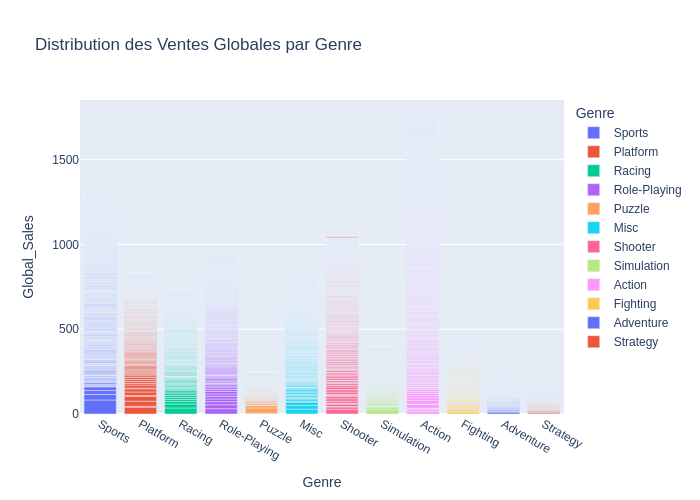

In [38]:
# Distribution des Glabal Sales par Genre

fig = px.bar(x = "Genre", y = "Global_Sales", title = "Distribution des Ventes Globales par Genre", data_frame = df,
             color = "Genre")
fig.show("png")



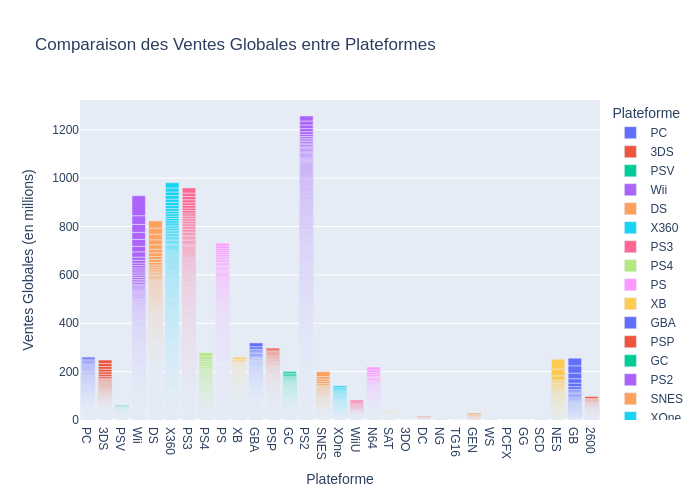

In [39]:
# Trier le DataFrame par Global Sales
sorted_globalsales = df.sort_values(by='Global_Sales')

fig = px.bar(sorted_globalsales, x='Platform', y='Global_Sales', color='Platform',
             title='Comparaison des Ventes Globales entre Plateformes',
             labels={'Global_Sales': 'Ventes Globales (en millions)', 'Platform': 'Plateforme'})
fig.show("png")


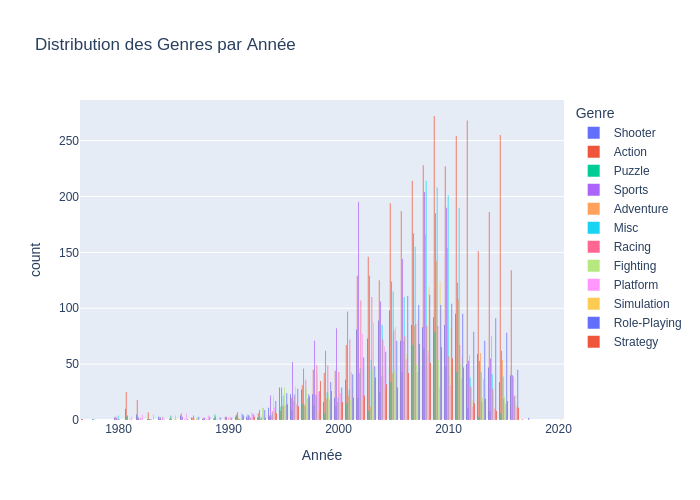

In [40]:
# Tri du DataFrame par Year

sorted_year = df.sort_values(by='Year')

# Distribution des Genres par Year

fig = px.histogram(sorted_year, x='Year', color='Genre', barmode='group',
                   title='Distribution des Genres par Année',
                   labels={'Year': 'Année', 'count': 'Nombre de Jeux'})
fig.show("png")


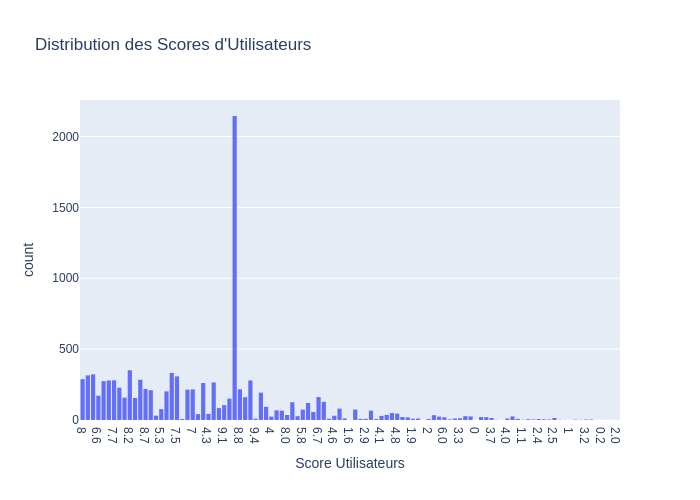

In [41]:
# Distribution des Critic Score

fig = px.histogram(df, x='Critic_Score', nbins=20,
                   title='Distribution des Scores de Critiques',
                   labels={'Critic_Score': 'Score Critiques'})
fig.show()

# Distribution des User Score

fig = px.histogram(df, x='User_Score', nbins=20,
                   title="Distribution des Scores d'Utilisateurs",
                   labels={'User_Score': 'Score Utilisateurs'})
fig.show("png")


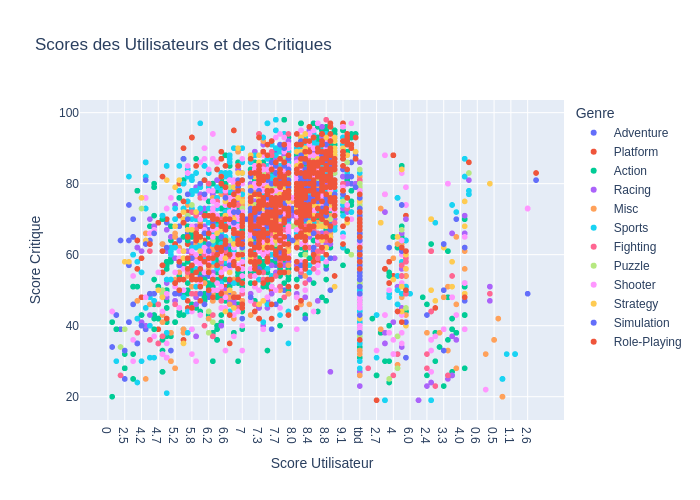

In [42]:
# Tri du DataFrame par User Score

sorted_userscore = df.sort_values(by='User_Score')

# Distribution des User Score par Genre

fig = px.scatter(sorted_userscore, x='User_Score', y='Critic_Score',
                 color='Genre',
                 title='Scores des Utilisateurs et des Critiques',
                 labels={'User_Score': 'Score Utilisateur', 'Critic_Score': 'Score Critique'})
fig.show("png")


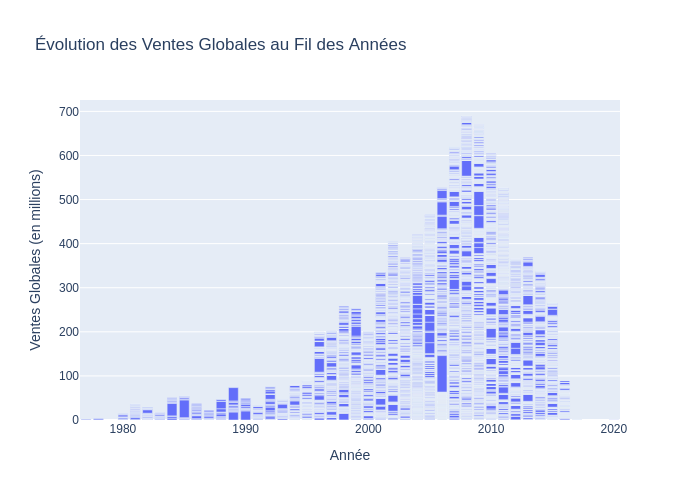

In [43]:
# Tri du DataFrame par Year

sorted_year = df.sort_values(by='Year')

# Evolution des Global Sales over time ( au fil des années)

fig = px.bar(sorted_year, x='Year', y='Global_Sales',
              title='Évolution des Ventes Globales au Fil des Années',
              labels={'Year': 'Année', 'Global_Sales': 'Ventes Globales (en millions)'})
fig.show("png")


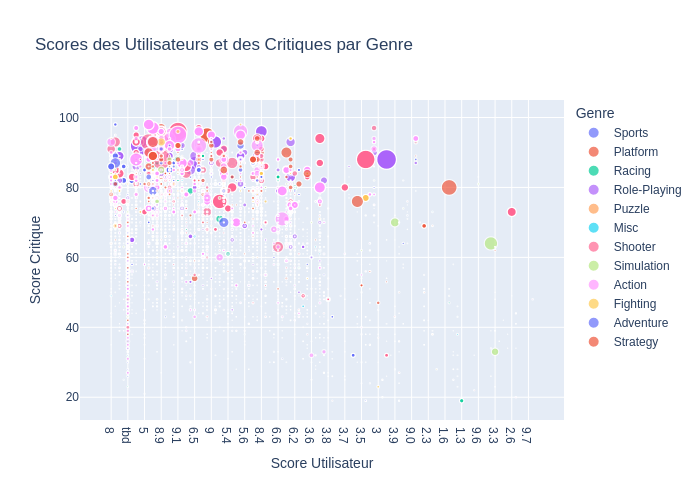

In [44]:
# Remplacement de NaN avec mean  (partie reprise de l'exploration de donnée)

genre_mean_usercount = df.groupby('Genre')['User_Count'].mean().to_dict()
df['User_Count'] = df.apply(lambda row: genre_mean_usercount[row['Genre']] if pd.isnull(row['User_Count']) else row['User_Count'], axis=1)

# User Score et des Critic Score par Genre


fig = px.scatter(df, x='User_Score', y='Critic_Score',
                 size='User_Count', color='Genre',
                 title='Scores des Utilisateurs et des Critiques par Genre',
                 labels={'User_Score': 'Score Utilisateur', 'Critic_Score': 'Score Critique'})
fig.show("png")




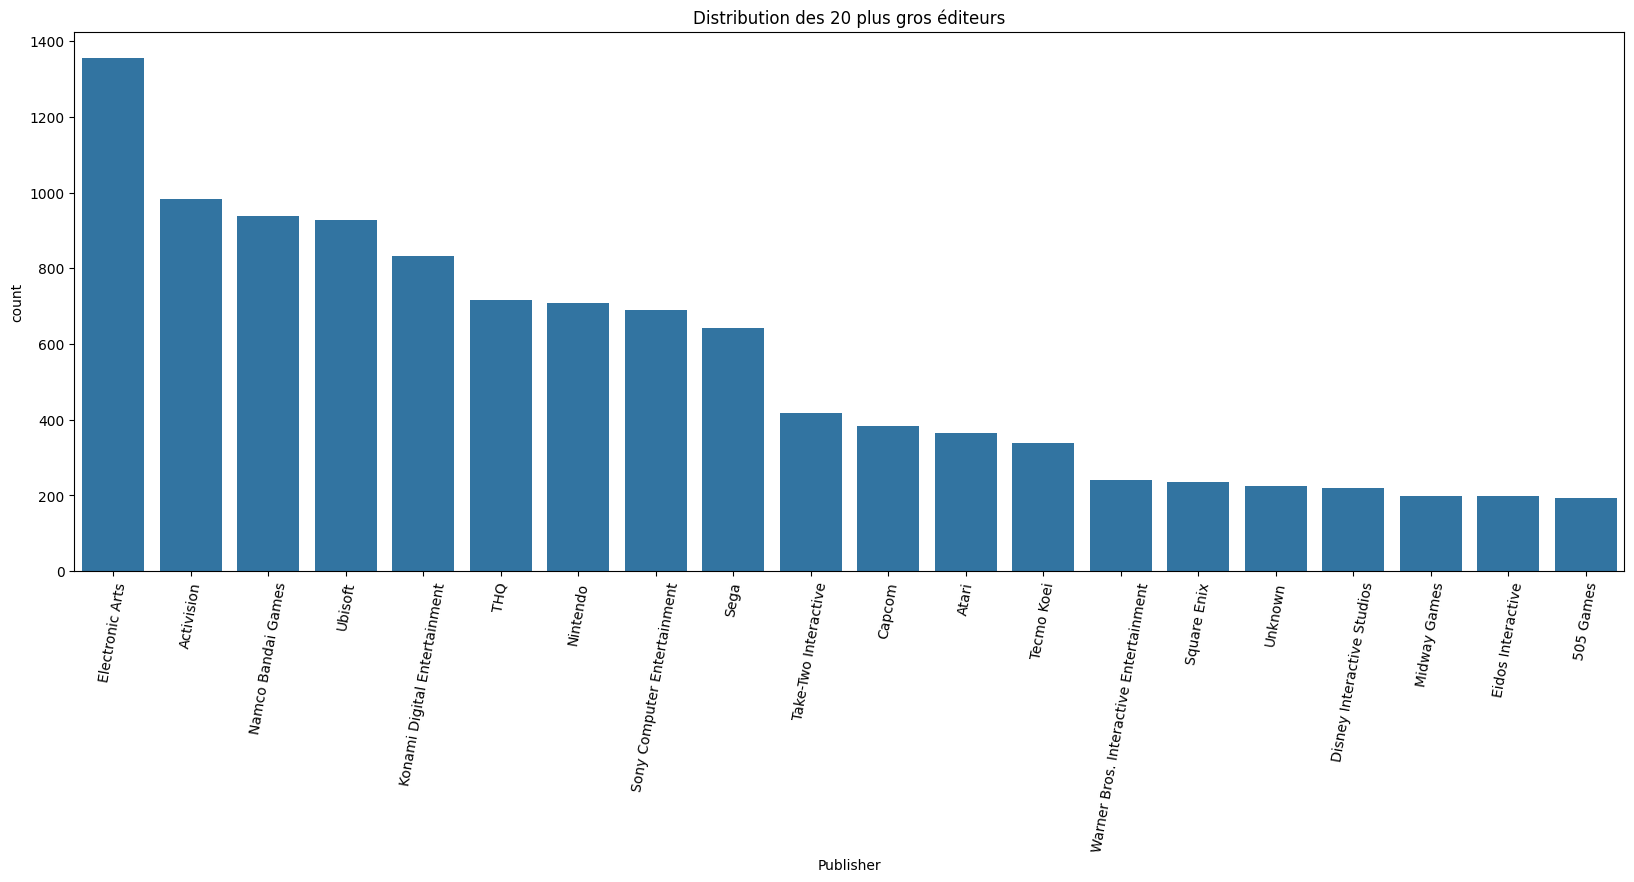

In [46]:
# Count le nombre de jeux par éditeur
publisher_counts = df['Publisher'].value_counts()

# Sélectionner Top 10 éditeurs avec le plus grand nombre de jeux
top_20_publishers = publisher_counts.nlargest(20).index

# Filtrer le DataFrame pour ne garder que les 10 plus gros éditeurs
df_top_20_publishers = df[df['Publisher'].isin(top_20_publishers)]

# Tracer le graphique
plt.figure(figsize=(20, 7))

sns.countplot(x='Publisher', data=df_top_20_publishers, order=top_20_publishers)
plt.title('Distribution des 20 plus gros éditeurs')
plt.xticks(rotation=80)
plt.show()

Meilleures ventes par éditeur :
Publisher
Nintendo                       1788.95
Electronic Arts                1116.48
Activision                      733.52
Sony Computer Entertainment     608.37
Ubisoft                         476.36
                                ...   
UIG Entertainment                 0.01
Boost On                          0.01
New World Computing               0.01
EON Digital Entertainment         0.01
Michaelsoft                       0.01
Name: Global_Sales, Length: 588, dtype: float64


<ipython-input-47-fbdd0f1dbe15>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




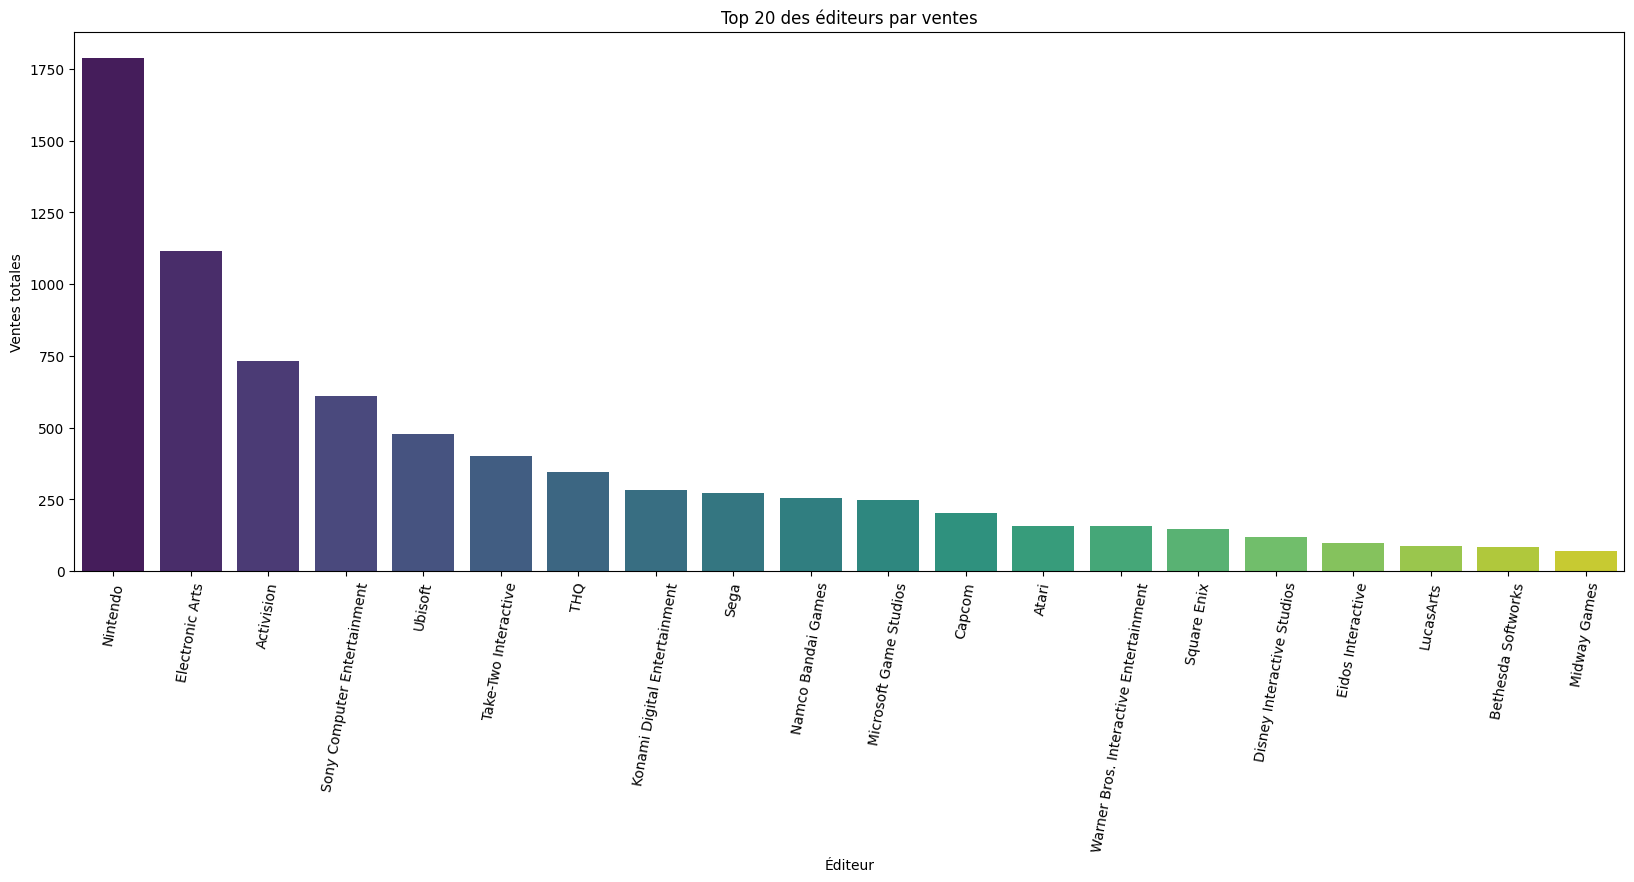

In [47]:
# Calculer les Global Sales par éditeur
ventes_par_editeur = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Afficher les best ventes par éditeur
print("Meilleures ventes par éditeur :")
print(ventes_par_editeur)

# Sélectionner les top 10 éditeurs (ou tout autre nombre)
top_editeurs = ventes_par_editeur.head(20)

# Tracer le graphique
plt.figure(figsize=(20, 7))
sns.barplot(x=top_editeurs.index, y=top_editeurs.values, palette='viridis')
plt.title('Top 20 des éditeurs par ventes')
plt.xlabel('Éditeur')
plt.ylabel('Ventes totales')
plt.xticks(rotation=80)
plt.show()